In [1]:
import os, time, datetime
import pickle as pk
import numpy as np
import pandas as pd
import pickle as pk
from sklearn import metrics
from matplotlib import pyplot as plt

gct = time.time
runtime = lambda et, st: str(datetime.timedelta(seconds=round(et-st)))

In [2]:
st = gct()
ProcDataDir = '/Shared/xunzhou/Shenzhen_new/haoyi/CongProg/FinalSubmissionResult'
predictProgProb = pk.load(open(os.path.join(ProcDataDir, 'pred'),'rb'))
print 'Runtime: %s' % (gct() - st)

Runtime: 565.824587107


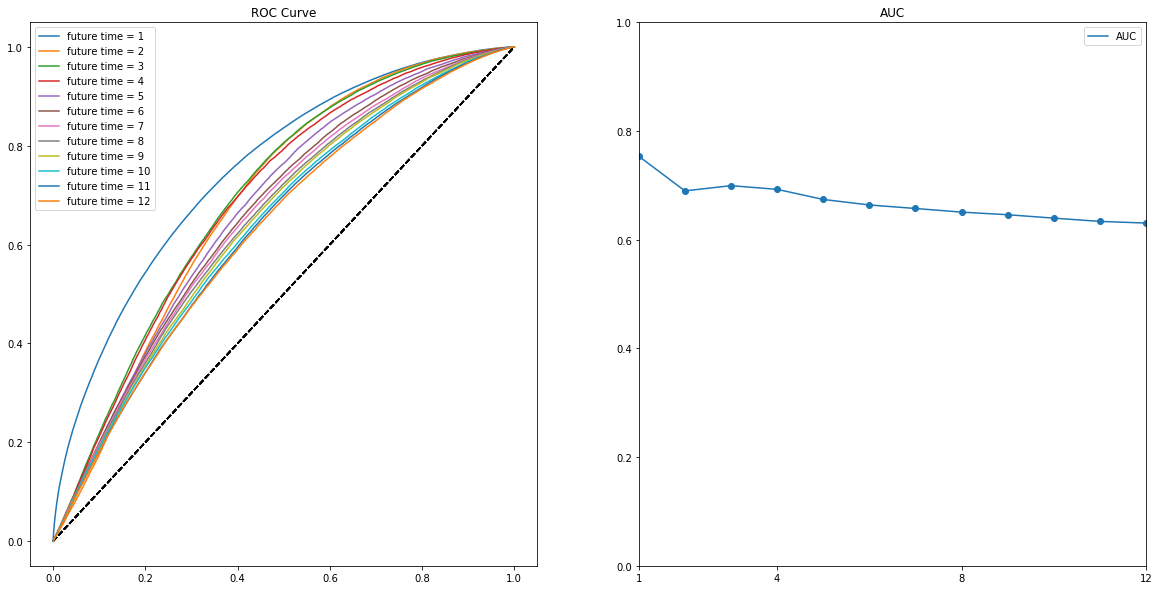

In [3]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
fprs, tprs = [], []
aucs = []
for i in xrange(len(predictProgProb)):
    y_true = []
    y_score = []
    for eEntry in predictProgProb[i]:
        prob, Flag = predictProgProb[i][eEntry]
        y_true.append(1 if Flag else 0)
        y_score.append(prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    axes[0].plot([0,1],[0,1],'k--')
    axes[0].plot(fpr, tpr, label='future time = %d' % (i+1))
    np.savetxt(os.path.join(ProcDataDir, 'AUC', 'fpr%d'%(i+1)), fpr)
    np.savetxt(os.path.join(ProcDataDir, 'AUC', 'tpr%d'%(i+1)), tpr)
    aucs.append(metrics.auc(fpr, tpr))
aucs = np.array(aucs)
np.savetxt(os.path.join(ProcDataDir, 'AUC', 'auc'), aucs)
axes[0].set_title('ROC Curve')
axes[1].plot([i+1 for i in xrange(len(predictProgProb))], aucs, label='AUC')
axes[1].scatter([i+1 for i in xrange(len(predictProgProb))], aucs)
axes[1].set_title('AUC')
axes[1].set_ylim(0,1)
axes[1].set_xlim(1,len(predictProgProb))
axes[0].legend()
axes[1].legend()
xticks = [1, 4, 8, 12]
axes[1].set_xticks(xticks)
plt.savefig(os.path.join(ProcDataDir, 'AUC', 'roc.png'))
plt.show()

In [ ]:
# for i in xrange(len(evaluationResult)):
#     print 't=%d' % (i+1)
#     ps = [0.01,0.05, 0.1, 0.15, 0.2, 0.24, 0.245, 0.3, 0.4, 0.5]
#     ACCs = []
#     PRECs = []
#     RECALLs = []
#     F1s = []
#     for p in ps: 
#         TP = 0
#         FP = 0
#         FN = 0
#         TN = 0
#         for eEntry in evaluationResult[i]:
#             prob, Flag =  evaluationResult[i][eEntry]
#             if prob >= p:
#                 pred = True
#                 if pred == Flag:
#                     TP += 1
#                 else:
#                     FP += 1
#             else:
#                 pred = False
#                 if pred == Flag:
#                     TN += 1
#                 else:
#                     FN += 1
#         acc = (TP+TN) * 1.0/ (TP+TN+FP+FN)
#         if TP+FP > 0:
#             prec = TP * 1.0 /(TP+FP)
#         else:
#             prec = 0.
#         if TP+FN > 0:
#             recall = TP * 1.0/(TP+FN)
#         else:
#             recall = 0.
#         if prec+recall > 0.:
#             f1 = 2*prec*recall/(prec+recall)
#         else:
#             f1 = 0.
#         ACCs.append(acc)
#         PRECs.append(prec)
#         RECALLs.append(recall)
#         F1s.append(f1)
#     maxInd = np.argwhere(np.array(F1s)==max(F1s)).flatten()[0]
#     print 'p=%f: Acc: %.3f, prec:%.3f, recall: %.3f, F1-score: %.3f' % (ps[maxInd], ACCs[maxInd], PRECs[maxInd], 
#                                                                         RECALLs[maxInd], F1s[maxInd])